# Test 7.0

## Theory Question 

Que 1-> How does ResNet solve the problem of network degradation?

Que 2-> What does "freezing the layer" mean in the context of transfer learning?

# Ans 1 ------

ResNet stands for Residual Network and it will solve the problem of network degradation by the following given below:

* 1. Residual Blocks

ResNet introduces residual blocks which consist of two or more layers where the output of the block is added to the input, creating a shortcut connection.

The shortcut connection directly passes the input to the output, skipping the intermediate layers. This means the network only needs to learn the residual mapping.

* 2. Addressing Vanishing and Exploding Gradients

By introducing the shortcut connections, ResNet helps to alleviate the vanishing and exploding gradient problems. During backpropagation, the gradients can flow directly through the shortcut connections, ensuring that they do not vanish or explode as they pass through many layers. This stabilizes the training process for very deep networks.



# ANS 2 ------

* Transfer Learning: 

This is a machine learning technique where a model developed for a specific task is reused as the starting point for a model on a second task. It carries the knowledge the model has gained from the first task to improve learning on the new task.


In the context of transfer learning, "freezing the layer" refers to the process of preventing certain layers of a pre-trained neural network from being updated during the training process on a new dataset.

* Freezing Layers: 

During transfer learning, you can choose to keep some of the layers of the pre-trained model fixed, meaning their weights will not be updated during training on the new dataset. This is typically done to leverage the pre-learned features from the original task without altering them.

## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task: 
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task: 
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task: 
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task: 
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task: 
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

Loaded images shape: (534, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (534,) /n Images with Folder name


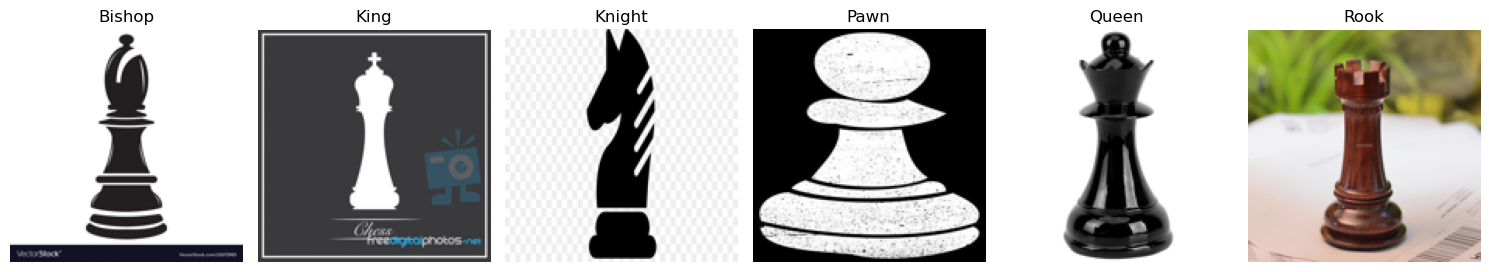

In [1]:
# Code for loading the dataset and plotting, with folder name
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = 'C:\\Users\\eklav\\Desktop\\Group_1\\Chess_Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [2]:
import tensorflow as tf

IMAGE_SIZE=224
BATCH_SIZE=32

# ImageDataGenerator for training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    zoom_range=0.2,   # Randomly zoom images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.1  # Reserve 10% of the data for validation
)

# ImageDataGenerator for validation data (testing data in this context)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    validation_split=0.1  # Specify the same validation split as for training
)


In [3]:
train_generator = train_datagen.flow_from_directory(
    dataset_directory,                    # Path to the target directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to 224x224 pixels
    batch_size=BATCH_SIZE,       # Number of images per batch
    class_mode='categorical',
    subset='training'            # Use subset 'training' from the directory
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_directory,                    # Path to the target directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to 224x224 pixels
    batch_size=BATCH_SIZE,       # Number of images per batch
    class_mode='categorical',
    subset='validation'          # Use subset 'validation' from the directory
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense  # Importing necessary layers from Keras
from tensorflow.keras.models import Model, Sequential  # Importing Model class and Sequential model from Keras
from glob import glob  # Importing glob module to handle file path expansion
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [5]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224, 224, 3), kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      75,501,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │          24,582 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,317,606 (352.16 MB)

 Trainable params: 92,317,606 (352.16 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model with categorical crossentropy loss function, Adam optimizer,
# and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
epoch = 1  # Number of training epochs

Alexnet = model.fit(train_generator,            # Training data generator
                    steps_per_epoch=len(train_generator),  # Number of steps (batches) per epoch
                    epochs=epoch,             # Number of epochs to train the model
                    validation_data=validation_generator,  # Validation data generator
                    validation_steps=len(validation_generator)  # Number of validation steps per epoch
                   )


16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.1759 - loss: 1.7873 - val_accuracy: 0.3077 - val_loss: 1.7657


In [9]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Accuracy: {val_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 0.2188 - loss: 1.7885
Validation Accuracy: 0.21875


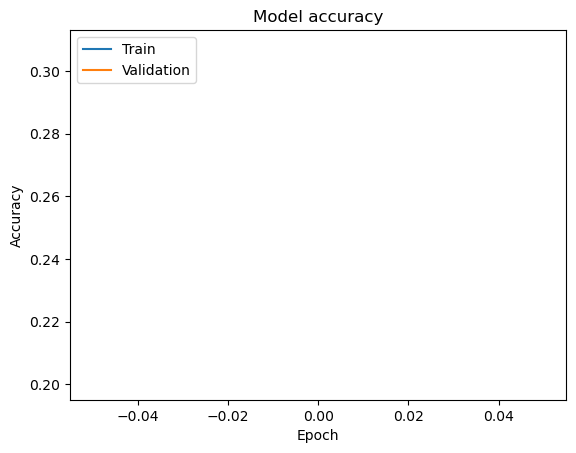

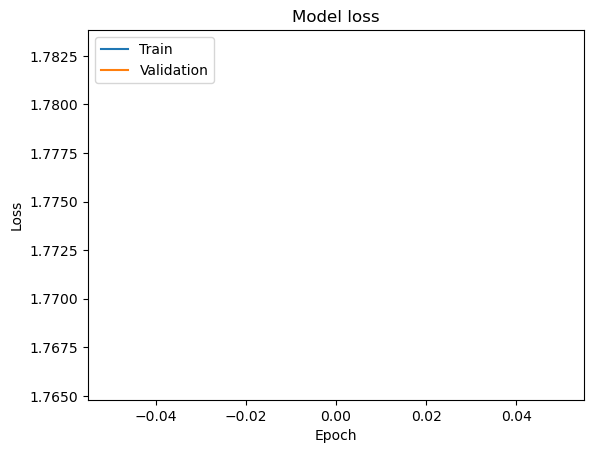

In [15]:
plt.plot(Alexnet.history['accuracy'])
plt.plot(Alexnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(Alexnet.history['loss'])
plt.plot(Alexnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
model.save('alexnet_chess.h5')

In [12]:
from tensorflow.keras.models import load_model

loaded_model = load_model('alexnet_chess.h5')
test_loss, test_acc = loaded_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1875 - loss: 1.7783
Test Accuracy: 0.1875
